# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Data Visualization

In [2]:
df = pd.read_csv('data.csv')
df.rename(columns={'-2': 'Coluna1', '-0.13536': 'Coluna2'}, inplace=True)
df

,Coluna1,Coluna2
0,-1.9920,0.57079
1,-1.9840,0.08298
2,-1.9760,0.23119
3,-1.9679,0.20137
4,-1.9599,0.65421
...,...,...
494,1.9679,0.46853
495,1.9760,0.62117
496,1.9840,0.46263
497,1.9920,0.30145


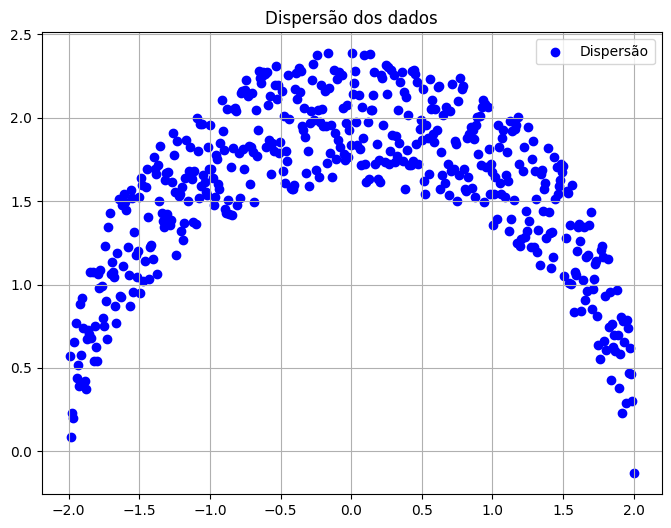

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Coluna1'], df['Coluna2'], marker='o', color='blue', label='Dispersão')
plt.title('Dispersão dos dados')
plt.legend()
plt.grid(True)
plt.savefig('linear_regression_plot.png')

plt.show()

# Regressão, SRV com Kernels diferentes e Métricas

Métricas para Regressão Linear:
MSE: 0.24522792618842548
RMSE: 0.49520493352593475
MAE: 0.39238259311589285
R²: 1.982316786275362e-06

Métricas para SVR (RBF Kernel):
MSE: 0.05542837561971052
RMSE: 0.23543231643024395
MAE: 0.20258129501854247
R²: 0.7739724565442774

Métricas para SVR (Polynomial Kernel):
MSE: 0.25302105709956674
RMSE: 0.5030119850456515
MAE: 0.38467789974654965
R²: -0.03177708780714017


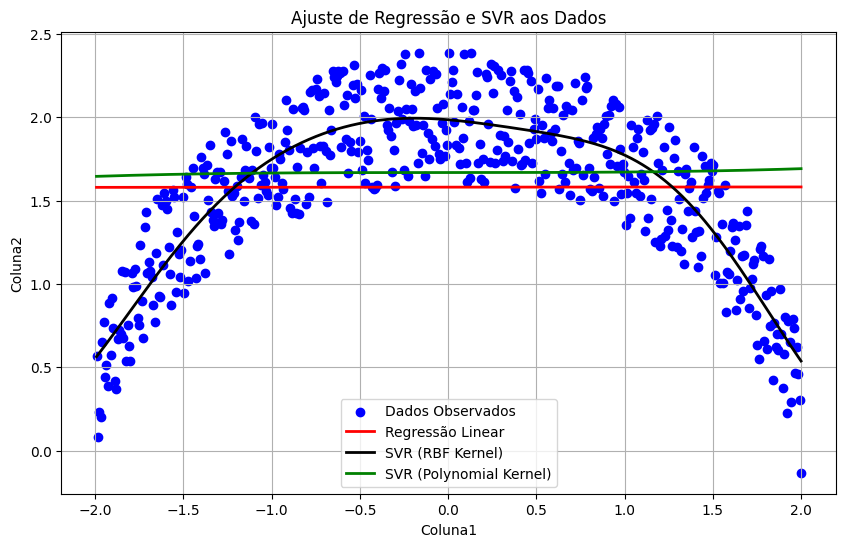

In [4]:
X = df[['Coluna1']]
y = df['Coluna2']

regression_model = LinearRegression()
svr_rbf = SVR(kernel='rbf')
svr_poly = SVR(kernel='poly', degree=3)

regression_model.fit(X, y)
svr_rbf.fit(X, y)
svr_poly.fit(X, y)

y_preds_linear = regression_model.predict(X)
y_preds_svr_rbf = svr_rbf.predict(X)
y_preds_svr_poly = svr_poly.predict(X)

mse_linear = mean_squared_error(y, y_preds_linear)
rmse_linear = np.sqrt(mse_linear)
mae_linear = mean_absolute_error(y, y_preds_linear)
r2_linear = r2_score(y, y_preds_linear)

mse_svr_rbf = mean_squared_error(y, y_preds_svr_rbf)
rmse_svr_rbf = np.sqrt(mse_svr_rbf)
mae_svr_rbf = mean_absolute_error(y, y_preds_svr_rbf)
r2_svr_rbf = r2_score(y, y_preds_svr_rbf)

mse_svr_poly = mean_squared_error(y, y_preds_svr_poly)
rmse_svr_poly = np.sqrt(mse_svr_poly)
mae_svr_poly = mean_absolute_error(y, y_preds_svr_poly)
r2_svr_poly = r2_score(y, y_preds_svr_poly)

print("Métricas para Regressão Linear:")
print(f"MSE: {mse_linear}")
print(f"RMSE: {rmse_linear}")
print(f"MAE: {mae_linear}")
print(f"R²: {r2_linear}")
print()

print("Métricas para SVR (RBF Kernel):")
print(f"MSE: {mse_svr_rbf}")
print(f"RMSE: {rmse_svr_rbf}")
print(f"MAE: {mae_svr_rbf}")
print(f"R²: {r2_svr_rbf}")
print()

print("Métricas para SVR (Polynomial Kernel):")
print(f"MSE: {mse_svr_poly}")
print(f"RMSE: {rmse_svr_poly}")
print(f"MAE: {mae_svr_poly}")
print(f"R²: {r2_svr_poly}")


plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados Observados')
plt.plot(X, y_preds_linear, color='red', linewidth=2, label='Regressão Linear')
plt.plot(X, y_preds_svr_rbf, color='black', linewidth=2, label='SVR (RBF Kernel)')
plt.plot(X, y_preds_svr_poly, color='green', linewidth=2, label='SVR (Polynomial Kernel)')
plt.xlabel('Coluna1')
plt.ylabel('Coluna2')
plt.title('Ajuste de Regressão e SVR aos Dados')
plt.legend()
plt.grid(True)
plt.savefig('Ajuste de Regressão e SVR aos Dados.png')

plt.show()

In [5]:
import pickle

metrics_linear = {
    "MSE": mse_linear,
    "RMSE": rmse_linear,
    "MAE": mae_linear,
    "R²": r2_linear
}

metrics_svr_rbf = {
    "MSE": mse_svr_rbf,
    "RMSE": rmse_svr_rbf,
    "MAE": mae_svr_rbf,
    "R²": r2_svr_rbf
}

metrics_svr_poly = {
    "MSE": mse_svr_poly,
    "RMSE": rmse_svr_poly,
    "MAE": mae_svr_poly,
    "R²": r2_svr_poly
}

with open('metrics_linear.pkl', 'wb') as file:
    pickle.dump(metrics_linear, file)

with open('metrics_svr_rbf.pkl', 'wb') as file:
    pickle.dump(metrics_svr_rbf, file)

with open('metrics_svr_poly.pkl', 'wb') as file:
    pickle.dump(metrics_svr_poly, file)